# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_excel("Raisin_Dataset.xlsx")

In [3]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df["Class"]= df["Class"].map({"Kecimen": 0, "Besni": 1})

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753
Class,900.000,0.500,0.500,0.000,0.000,0.500,1.000,1.000


In [7]:
df["Class"].value_counts()

Class
0    450
1    450
Name: count, dtype: int64

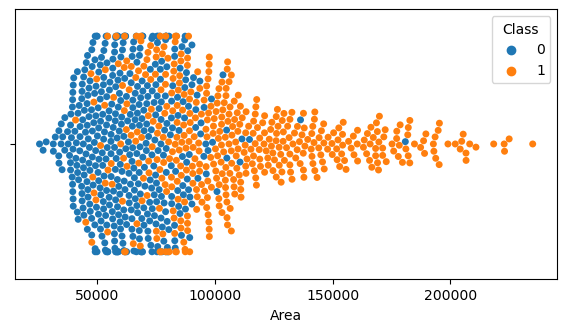

In [8]:
plt.figure(figsize=(7,3.5))
sns.swarmplot(x= df.Area, data=df, hue="Class");

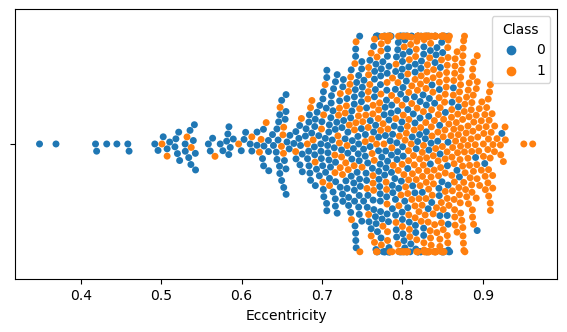

In [9]:
plt.figure(figsize=(7,3.5))
sns.swarmplot(x= df.Eccentricity, data=df, hue="Class");

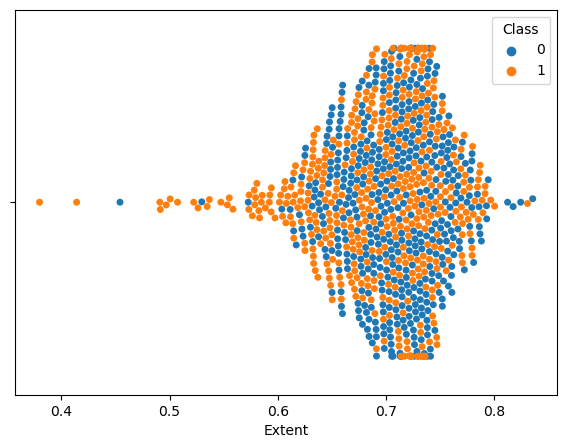

In [10]:
plt.figure(figsize=(7,5))
sns.swarmplot(x= df.Extent, data=df, hue="Class");

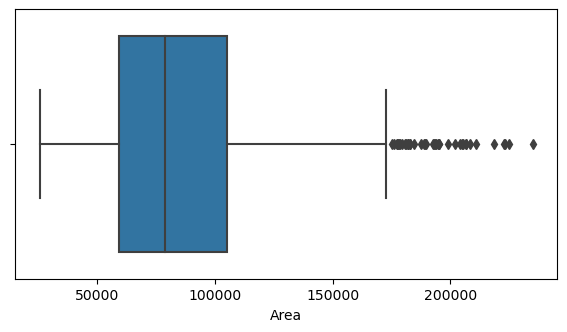

In [11]:
plt.figure(figsize=(7,3.5))
sns.boxplot(x= df.Area,data=df);

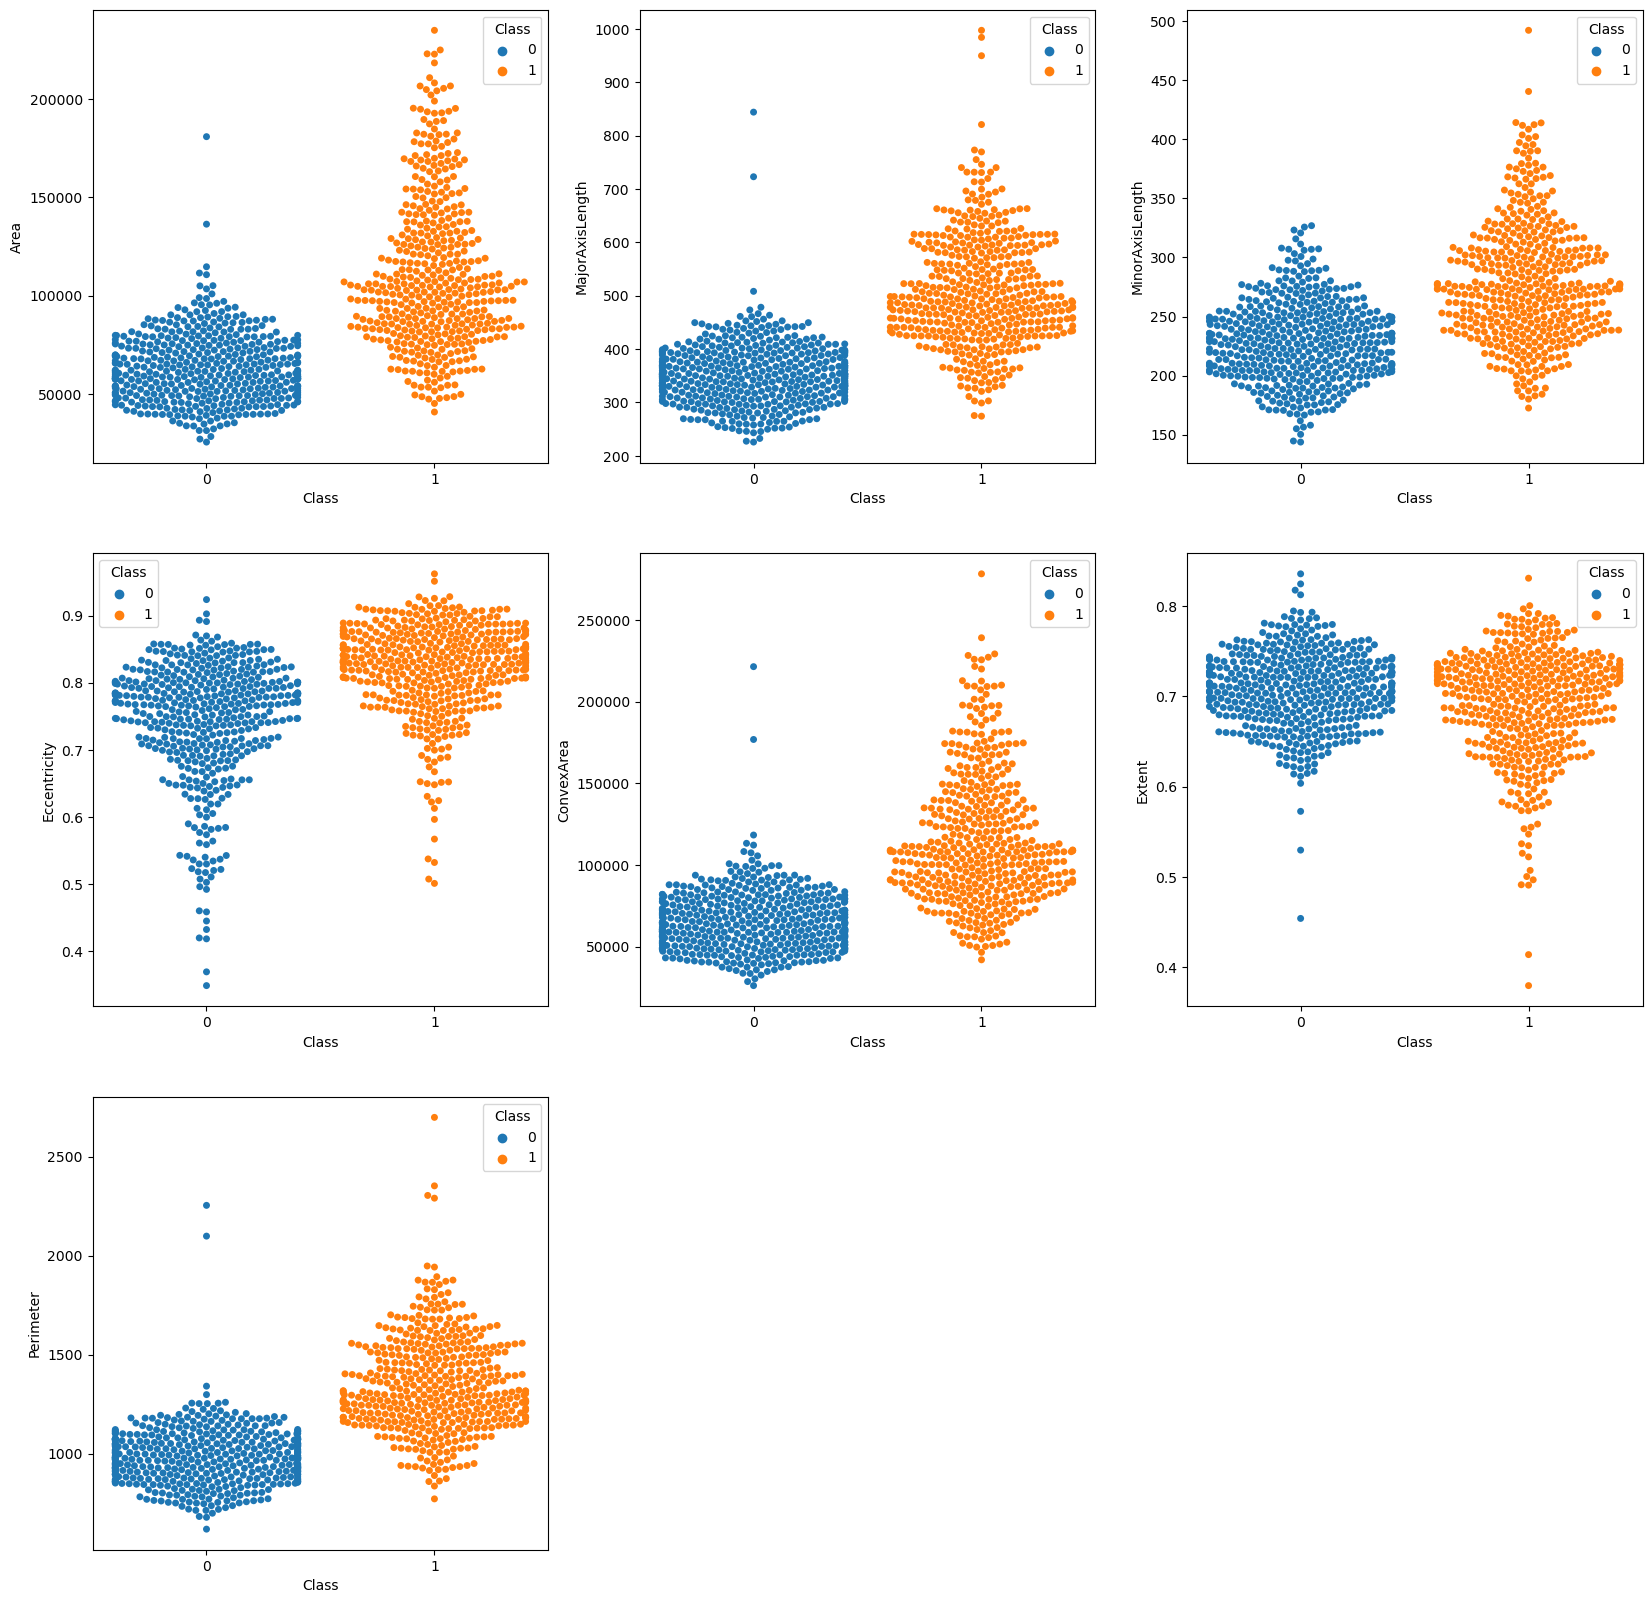

In [12]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,3,index)
        sns.swarmplot(x='Class',y=feature,data=df, hue= "Class")
plt.show()

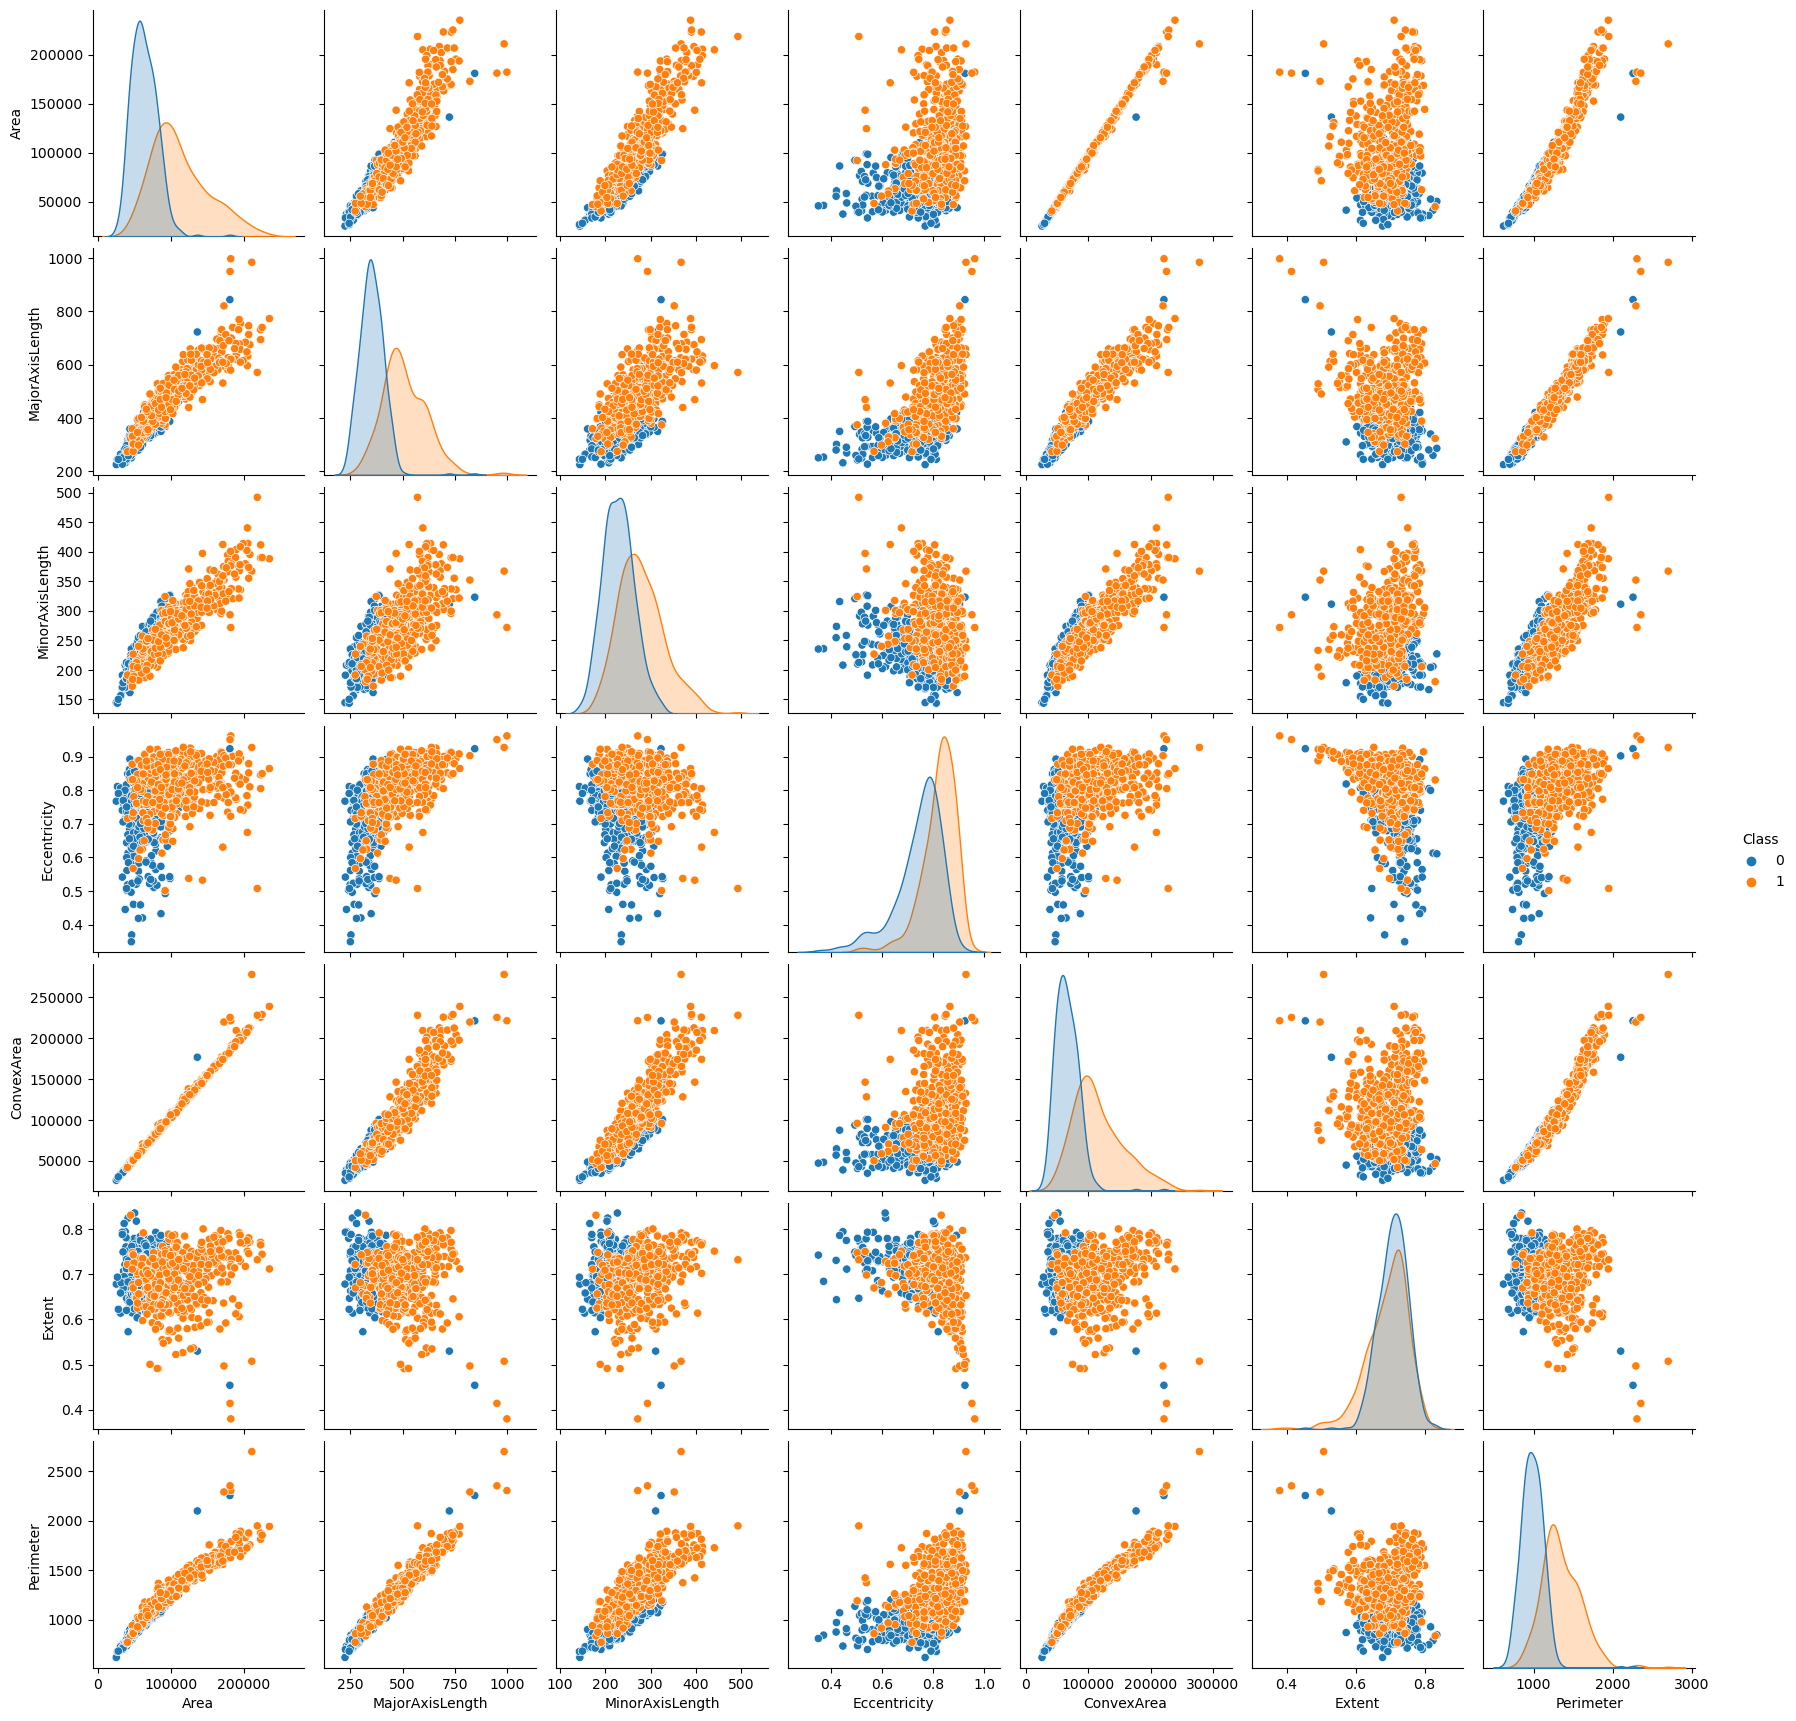

In [13]:
sns.pairplot(df, hue="Class")

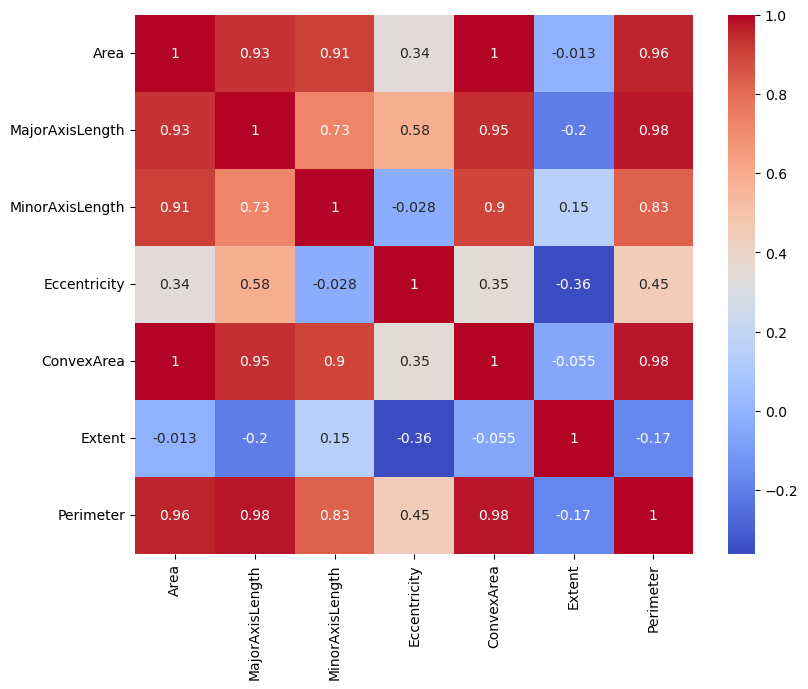

In [14]:
plt.figure(figsize=(9,7))
sns.heatmap(df.drop("Class",axis=1).corr(), annot =True,cmap="coolwarm");

## Train | Test Split and Scaling

In [15]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.222, random_state = 42)

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_model = LogisticRegression()

In [22]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
pd.DataFrame(log_model.coef_.flatten(), index= df.drop("Class", axis=1).columns.tolist())

,0
Area,2.643
MajorAxisLength,3.082
MinorAxisLength,1.093
Eccentricity,2.898
ConvexArea,2.847
Extent,-1.515
Perimeter,3.375


In [24]:
log_model.coef_ 

array([[ 2.6427072 ,  3.08153405,  1.09288721,  2.8983797 ,  2.84727108,
        -1.51526423,  3.37540346]])

In [25]:
log_model.intercept_

array([-4.53860744])

In [26]:
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [27]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data["pred"] = y_pred
test_data.sample(12, random_state= 7)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba,pred
381,31237,262.347,155.026,0.807,32564,0.614,718.847,0,0.068,0
326,76407,373.442,264.474,0.706,79086,0.731,1074.702,0,0.308,0
688,57999,311.022,243.476,0.622,61519,0.656,968.697,1,0.125,0
533,131816,532.731,322.683,0.796,138992,0.722,1488.840,1,0.941,1
81,53890,331.086,216.579,0.756,57109,0.704,957.132,0,0.167,0
231,52693,283.504,242.114,0.520,54860,0.738,895.745,0,0.043,0
294,70196,373.198,243.881,0.757,71937,0.691,1024.256,0,0.316,0
778,148073,599.363,327.084,0.838,152985,0.690,1557.606,1,0.980,1
668,206689,746.145,355.301,0.879,212569,0.746,1876.028,1,0.999,1
448,50312,354.236,182.312,0.857,52070,0.623,961.439,0,0.272,0


## Model Performance

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [30]:
confusion_matrix(y_test, y_pred)

array([[92, 16],
       [10, 82]], dtype=int64)

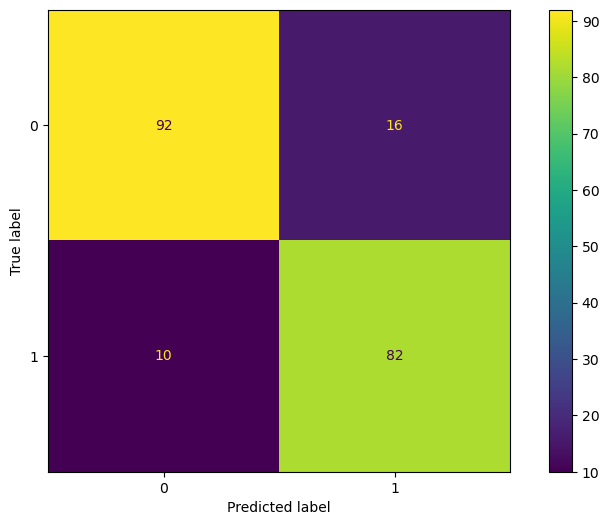

In [31]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test);

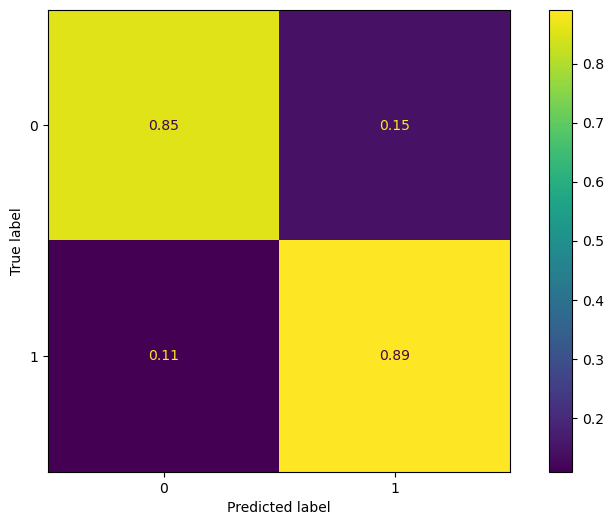

In [32]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test, normalize='true');

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       108
           1       0.84      0.89      0.86        92

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [34]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       342
           1       0.89      0.84      0.86       358

    accuracy                           0.86       700
   macro avg       0.87      0.86      0.86       700
weighted avg       0.87      0.86      0.86       700



### Cross Validate

In [35]:
from sklearn.model_selection import cross_validate

In [36]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 5)
df_scores = pd.DataFrame(scores, index = range(1,6))                                         # ,return_train_score=True
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.006,0.006,0.868,0.819,0.843,0.843
2,0.005,0.006,0.903,0.903,0.903,0.900
3,0.004,0.006,0.921,0.806,0.859,0.864
4,0.004,0.006,0.836,0.789,0.812,0.814
5,0.004,0.005,0.953,0.859,0.904,0.907


In [37]:
df_scores.mean()[2:] # compare with below

test_precision   0.896
test_recall      0.835
test_f1          0.864
test_accuracy    0.866
dtype: float64

In [38]:
print("Test set")
print(classification_report(y_test, y_pred))

print("Train Set\n")
print(classification_report(y_train, y_train_pred))

Test set
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       108
           1       0.84      0.89      0.86        92

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

Train Set

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       342
           1       0.89      0.84      0.86       358

    accuracy                           0.86       700
   macro avg       0.87      0.86      0.86       700
weighted avg       0.87      0.86      0.86       700



### GridSearchCV

In [56]:
from sklearn.model_selection import GridSearchCV

In [91]:
model = LogisticRegression()

penalty = ["l1", "l2"]
class_weight= ["balanced", None] 
C = np.linspace(0.01, 0.1 ,20)
solver = ["lbfgs", "liblinear", "sag", "saga"] 

param_grid = {"penalty" : penalty,
              "C" : [C, 0.97, 1, 1.01],  # hata alan alanlar "log_model__C" : C, yapsınlar
              "class_weight":class_weight,
              "solver":solver}

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',   # Default olarak 1 sınıfının scorunu max. eder    
                          n_jobs = -1) # bütün işlemciler burda çalışsın diye

In [92]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [array([0.01      , 0.01473684, 0.01947368, 0.02421053, 0.02894737,
       0.03368421, 0.03842105, 0.04315789, 0.04789474, 0.05263158,
       0.05736842, 0.06210526, 0.06684211, 0.07157895, 0.07631579,
       0.08105263, 0.08578947, 0.09052632, 0.09526316, 0.1       ]),
                               0.97, 1, 1.01],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [107]:
grid_model.best_index_
# en iyi scorun alındığı df indexini döndürür.

21

In [93]:
grid_model.best_score_ #0.8542857142857144

0.8685714285714287

In [95]:
grid_model.best_params_

{'C': 0.97, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

In [44]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [96]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[93 15]
 [11 81]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       108
           1       0.84      0.88      0.86        92

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200


Train_Set
[[309  33]
 [ 58 300]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       342
           1       0.90      0.84      0.87       358

    accuracy                           0.87       700
   macro avg       0.87      0.87      0.87       700
weighted avg       0.87      0.87      0.87       700



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [97]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve, roc_auc_score, auc, roc_curve

In [98]:
AUC = roc_auc_score(y_test, y_pred_proba[:, 1])
AUC

0.9230072463768116

In [ ]:
# RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

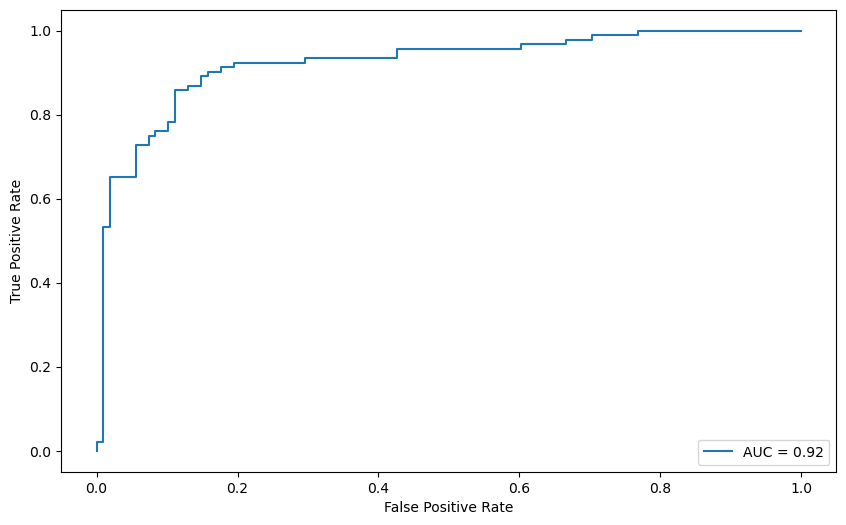

In [99]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1]) #Dengeli datalarda bu skora bakacağız
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=AUC).plot()

In [100]:
from sklearn.metrics import average_precision_score, PrecisionRecallDisplay, precision_recall_curve
AP = average_precision_score(y_test, y_pred_proba[:, 1]) 
AP

0.9023447567129191

In [ ]:
# PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);

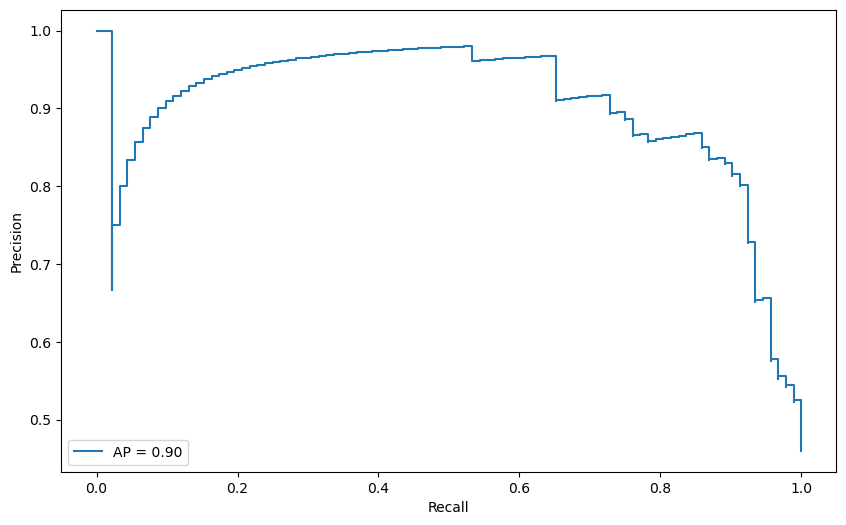

In [101]:
prec, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1]) # Dengesiz datalarda bu skora bakacağız
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall, average_precision= AP).plot() 

# Conclusion 

In [102]:
scaler = StandardScaler().fit(X)

In [103]:
import pickle
pickle.dump(scaler, open("scaler_hearing", "wb")) # wb = write binary

In [104]:
X_scaled = scaler.transform(X)

In [105]:
final_model = LogisticRegression(C= 0.01473684210526316, penalty='l2').fit(X_scaled, y)

In [106]:
pickle.dump(final_model, open("final_model_diabates", 'wb'))